In [1]:
import pickle
import numpy as np
import pandas as pd
df = pd.read_csv('gang_csv.csv')
df.head()
adj_matrix = np.load('adj_matrix.npy')
with open('./edges_index.pickle', 'rb') as fr:
    edge_index = pickle.load(fr)
for i in range(len(adj_matrix)):
    adj_matrix[i][i] = 1

In [2]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NJOBS=16
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Detecting 1 CUDA device(s).


In [5]:
data = df

In [6]:
data

,1220029700,1220032100,1220033000,1220024600,1220028200,1210030000,1220025300,1220029200,1220034000,1220034300,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
0,25.19,29.65,28.08,25.14,20.30,36.73,28.74,31.59,32.78,27.48,...,31.11,31.87,25.61,35.04,36.00,31.82,25.18,24.80,17.00,29.09
1,26.96,24.27,26.63,26.65,20.49,36.74,26.28,28.80,30.56,26.95,...,30.26,34.42,26.18,34.95,36.61,30.24,25.07,21.33,26.80,28.95
2,26.20,28.07,27.76,24.94,22.35,32.30,27.88,32.74,32.22,35.34,...,33.27,24.70,24.06,31.08,37.30,27.94,24.16,30.84,24.68,31.14
3,26.72,23.98,26.34,27.54,24.68,40.67,29.85,27.55,28.83,31.98,...,32.80,30.08,26.93,35.77,34.74,27.34,25.15,27.20,24.02,33.40
4,27.21,24.11,26.63,24.71,19.57,32.51,26.93,29.77,30.60,28.39,...,30.48,26.82,26.36,32.22,38.51,28.47,23.82,30.69,23.19,33.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,25.93,30.45,24.45,33.18,15.57,31.32,20.59,30.61,29.28,23.61,...,19.85,25.20,27.80,31.92,30.67,24.67,29.33,27.84,25.39,19.88
2876,28.45,27.57,25.38,26.65,14.22,37.60,22.52,28.59,31.06,23.44,...,24.13,22.81,30.25,33.22,30.90,35.58,24.49,20.18,23.27,20.13
2877,25.24,27.17,25.96,30.91,14.31,29.73,22.32,33.68,27.55,24.82,...,22.21,23.94,30.70,37.34,36.29,26.00,27.74,24.46,27.52,21.00
2878,28.05,27.64,26.57,27.84,14.21,36.52,19.66,34.09,38.60,23.98,...,24.17,20.92,29.39,31.57,32.62,27.73,31.33,30.03,22.63,20.20


--- Execution time : 209. seconds ---


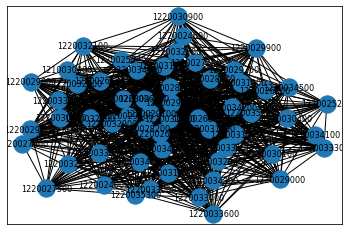

,0,1,2
0,1220029700,1220028200,0.000192
1,1220029700,1210030000,0.000011
2,1220029700,1220025300,0.000033
3,1220029700,1220027500,0.000096
4,1220029700,1220034200,0.000019
...,...,...,...
858,1220029300,1220029200,0.000488
859,1220029300,1220029800,0.002597
860,1220029300,1220032900,0.001447
861,1220032900,1220029800,0.001247


In [7]:
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=10, test_epochs=5, l1=0.1, batch_size=1000)

start_time = time.time()
ugraph = Fsgnn.predict(data, threshold=1e-7)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))